In [1]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
!pip install yfinance

     ---------------------------------------- 3.6/3.6 MB 14.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [4]:
name = 'GOOG'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2020-09-10")
x = df['Close']

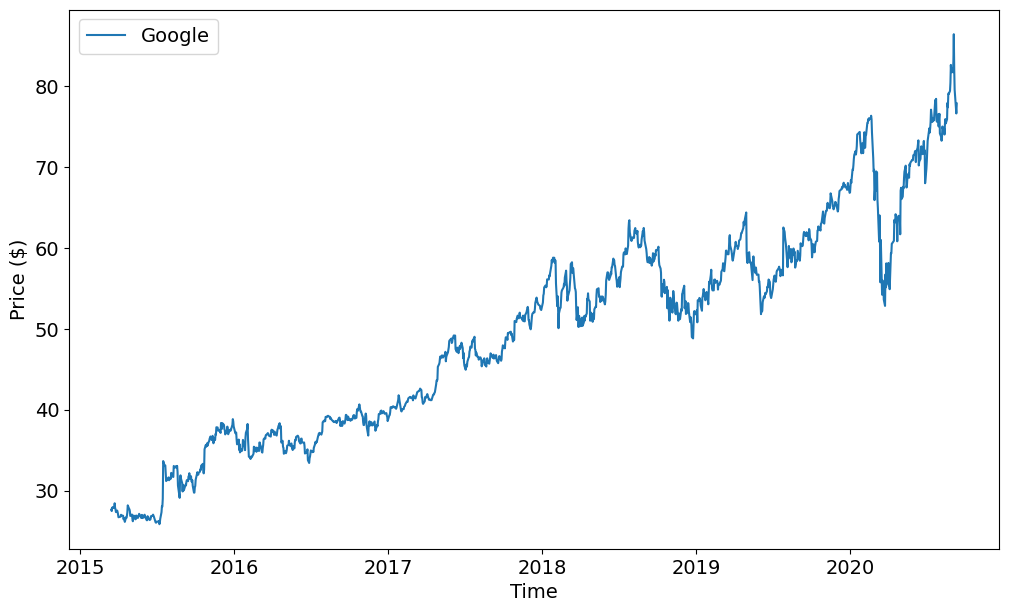

In [5]:
plt.plot(x,label="Google")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()
     

In [6]:
returns = x.pct_change(1).dropna()

In [7]:
returns[0:10]

Date
2015-03-17 00:00:00-04:00   -0.006618
2015-03-18 00:00:00-04:00    0.015721
2015-03-19 00:00:00-04:00   -0.002699
2015-03-20 00:00:00-04:00    0.004247
2015-03-23 00:00:00-04:00   -0.002766
2015-03-24 00:00:00-04:00    0.020365
2015-03-25 00:00:00-04:00   -0.020002
2015-03-26 00:00:00-04:00   -0.006469
2015-03-27 00:00:00-04:00   -0.012303
2015-03-30 00:00:00-04:00    0.006729
Name: Close, dtype: float64

In [8]:
(x[1]-x[0])/x[0]

-0.006618426007600398

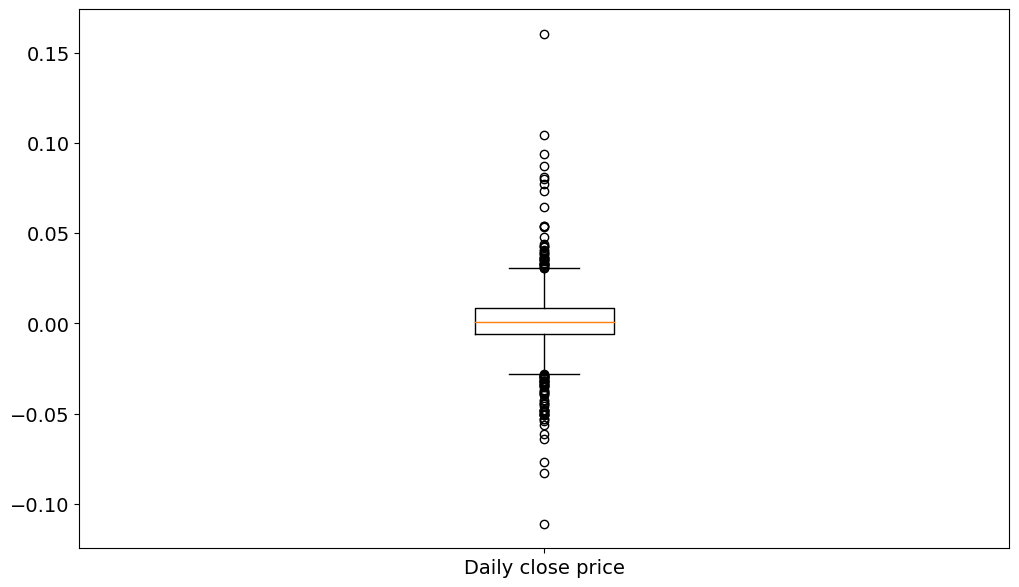

In [9]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

In [10]:
returns.describe()

count    1382.000000
mean        0.000893
std         0.017015
min        -0.111008
25%        -0.006044
50%         0.000906
75%         0.008677
max         0.160524
Name: Close, dtype: float64

In [11]:
np.mean(returns)

0.0008932031414496244

In [12]:
np.std(returns)

0.017009342276554863

In [13]:
np.quantile(returns,0.5)

0.0009057983734317432

In [14]:
skew(returns)


0.5494373649909662

In [15]:
skewtest(returns)

SkewtestResult(statistic=7.860103172215555, pvalue=3.838171907757484e-15)

In [16]:
kurtosis(returns)

11.114327275723149

In [17]:
kurtosistest(returns)

KurtosistestResult(statistic=16.36196821476275, pvalue=3.573879113074829e-60)

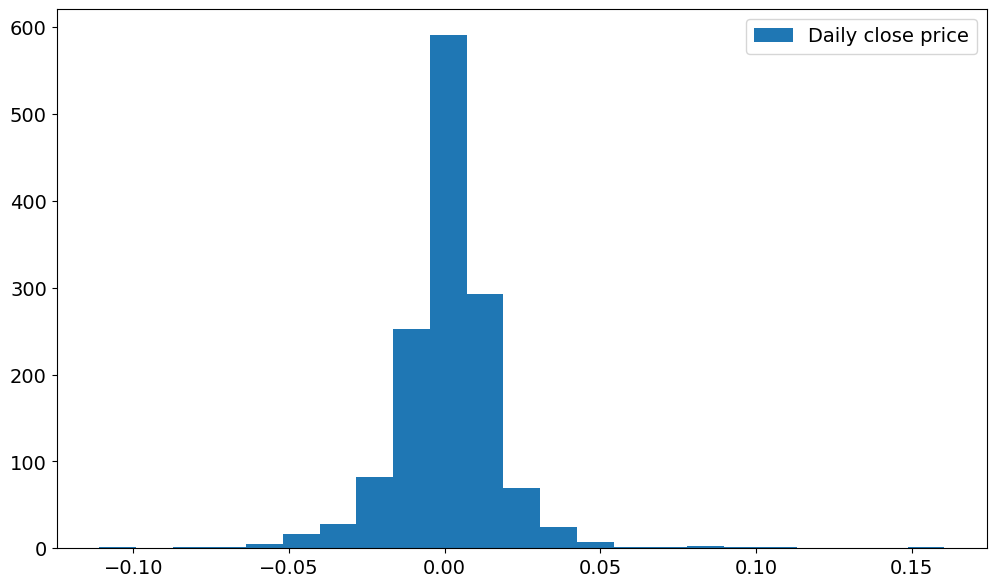

In [18]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [19]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

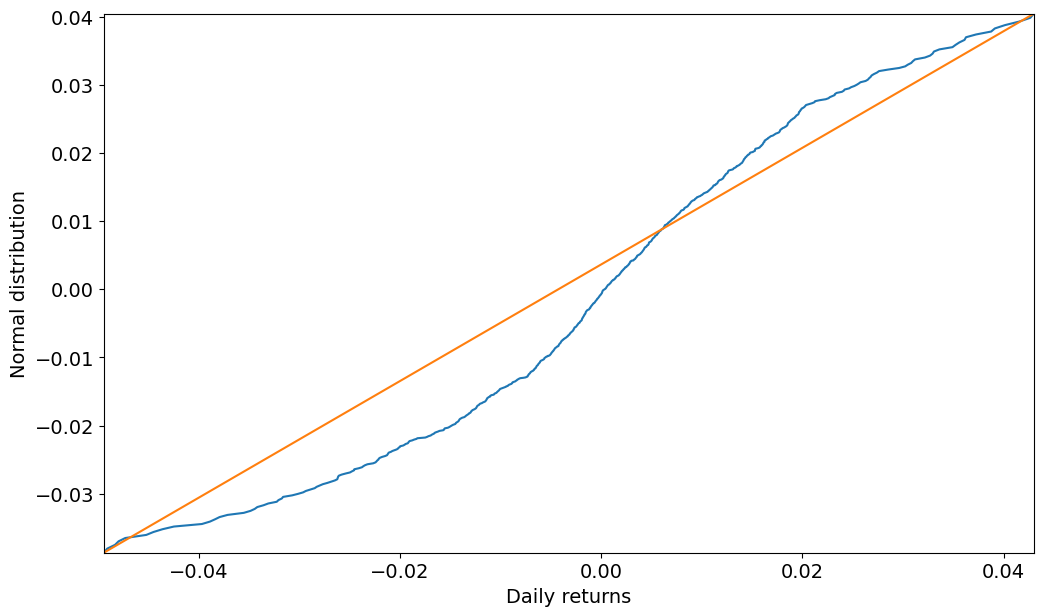

In [20]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

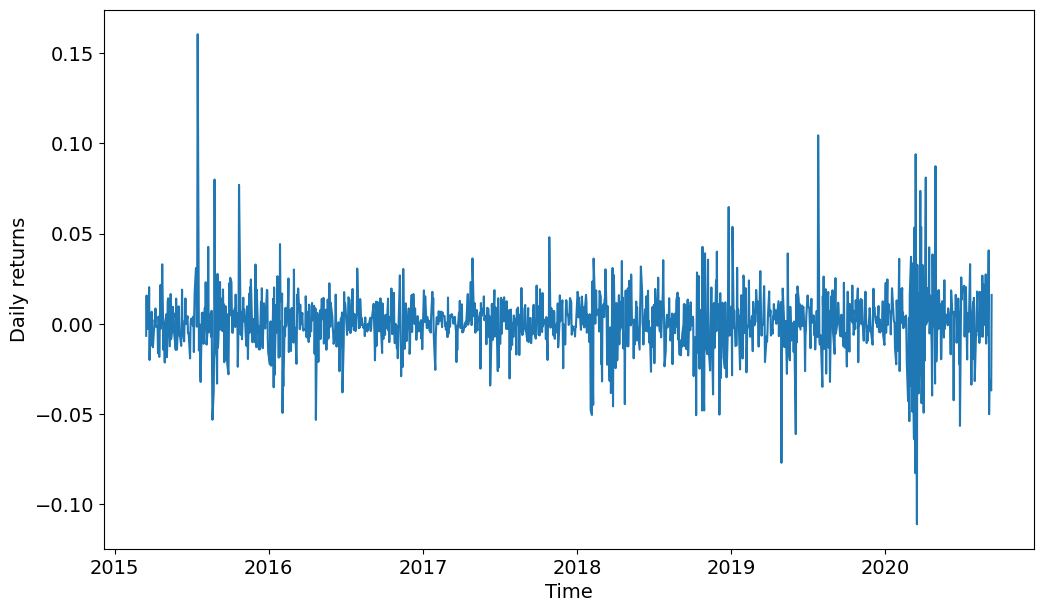

In [21]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

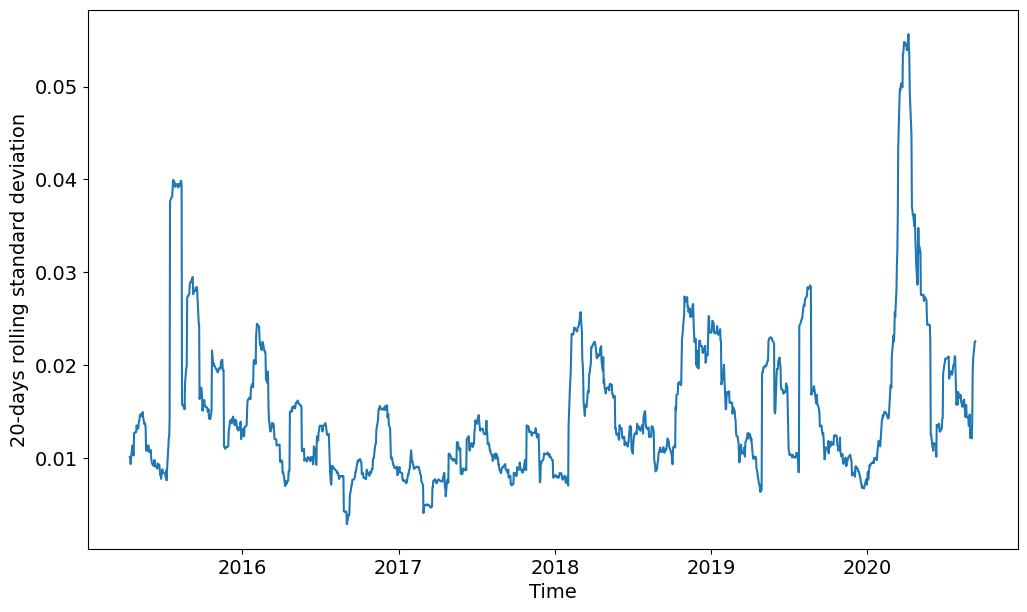

In [22]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

C:\Users\risha\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


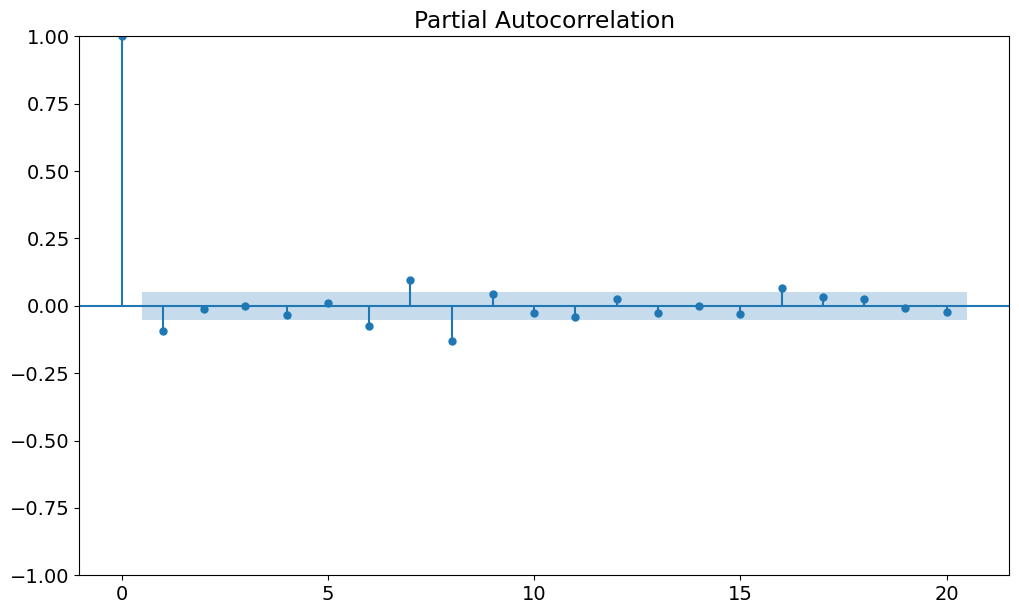

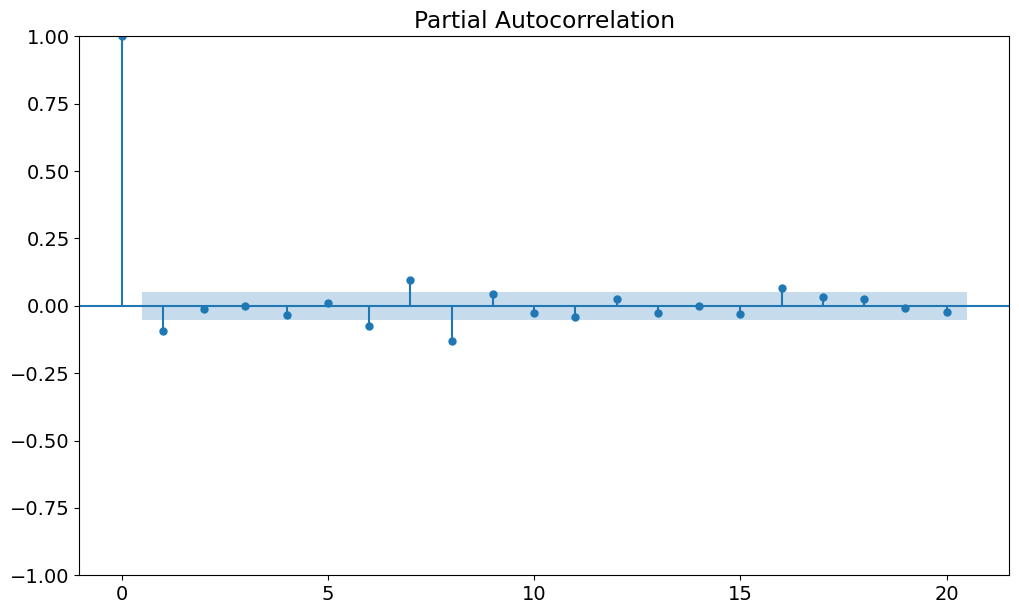

In [23]:
plot_pacf(returns,lags=20)